<h3>Import and install of libraries/packages</h3>

In [1]:
import pandas as pd
import requests
import numpy as np
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

<h3>Set the station data of MTR station in Hong Kong (Ma On Shan Line) to Panda Dataframe</h3>

In [2]:
MTR_station = [['Tai Wai Station', 'TAW'],['Che Kung Temple Station', 'CKT'],['Sha Tin Wai Station', 'STW'], ['City One Station', 'CIO'], ['Shek Mun Station', 'SHM'], ['Tai Shui Hang Station', 'TSH'], ['Heng On Station', 'HEO'], ['Ma On Shan Station', 'MOS'], ['Wu Kai Sha Station', 'WKS']]
df_station = pd.DataFrame(MTR_station, columns = ['stationName', 'code']) 
df_station

,stationName,code
0,Tai Wai Station,TAW
1,Che Kung Temple Station,CKT
2,Sha Tin Wai Station,STW
3,City One Station,CIO
4,Shek Mun Station,SHM
5,Tai Shui Hang Station,TSH
6,Heng On Station,HEO
7,Ma On Shan Station,MOS
8,Wu Kai Sha Station,WKS


In [3]:
MTR_station_cor = []
for station in MTR_station:
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(station[0])
    latitude = location.latitude
    longitude = location.longitude
    MTR_station_cor.append([latitude,longitude])

In [4]:
df_cor = pd.DataFrame(MTR_station_cor, columns = ['latitude', 'longitude']) 
df_cor

,latitude,longitude
0,22.373022,114.180118
1,22.374746,114.186186
2,22.376982,114.195027
3,22.382810,114.203746
4,22.387735,114.208445
5,22.408496,114.222720
6,22.417615,114.225722
7,22.422811,114.230191
8,22.428360,114.243469


In [5]:
df_merged = pd.concat([df_station, df_cor], axis=1)
df_merged

,stationName,code,latitude,longitude
0,Tai Wai Station,TAW,22.373022,114.180118
1,Che Kung Temple Station,CKT,22.374746,114.186186
2,Sha Tin Wai Station,STW,22.376982,114.195027
3,City One Station,CIO,22.382810,114.203746
4,Shek Mun Station,SHM,22.387735,114.208445
5,Tai Shui Hang Station,TSH,22.408496,114.222720
6,Heng On Station,HEO,22.417615,114.225722
7,Ma On Shan Station,MOS,22.422811,114.230191
8,Wu Kai Sha Station,WKS,22.428360,114.243469


In [6]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [7]:
# Shatin Center latitude and longitude using Google search
shatin_lat = 22.3771
shatin_lng = 114.1974

# Creates map of Kolkata using latitude and longitude values
map_shatin = folium.Map(location=[shatin_lat, shatin_lng], zoom_start=14)

# Add markers to map
for lat, lng, stationname in zip(df_merged['latitude'], df_merged['longitude'], df_merged['stationName']):
    label = '{}'.format(stationname)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shatin)  

map_shatin

In [9]:
CLIENT_ID = 'AZUQEH0LYSKEIZWD0LOB1OTMPIIX2UCQZQAESFYFYSPFZMAV' # your Foursquare ID
CLIENT_SECRET = 'DOQ3542FI0TFUEYU5RTK4IXRKNEWPX550Y5JQ2PFXHXGU3CE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AZUQEH0LYSKEIZWD0LOB1OTMPIIX2UCQZQAESFYFYSPFZMAV
CLIENT_SECRET:DOQ3542FI0TFUEYU5RTK4IXRKNEWPX550Y5JQ2PFXHXGU3CE


In [10]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
def getNearbyVenues(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        radius = 1000    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['stationName', 
                  'stationLatitude', 
                  'stationLongitude', 
                  'venueNearby', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
Shatin_venues = getNearbyVenues(names=df_merged['stationName'],
                                   latitudes=df_merged['latitude'],
                                   longitudes=df_merged['longitude'])

Tai Wai Station
Che Kung Temple Station
Sha Tin Wai Station
City One Station
Shek Mun Station
Tai Shui Hang Station
Heng On Station
Ma On Shan Station
Wu Kai Sha Station


In [13]:
Shatin_venues

,stationName,stationLatitude,stationLongitude,venueNearby,Venue Latitude,Venue Longitude,Venue Category
0,Tai Wai Station,22.373022,114.180118,Che Kung Temple (車公廟),22.373409,114.182684,Temple
1,Tai Wai Station,22.373022,114.180118,Dear coffee and bakery,22.372665,114.176863,Café
2,Tai Wai Station,22.373022,114.180118,Hong Kong Heritage Museum (香港文化博物館),22.376762,114.185602,History Museum
3,Tai Wai Station,22.373022,114.180118,生昌潮洲海鮮酒家,22.365767,114.175536,Chinese Restaurant
4,Tai Wai Station,22.373022,114.180118,Shatin Chicken Congee (沙田強記雞粥),22.376398,114.177253,Cantonese Restaurant
...,...,...,...,...,...,...,...
242,Wu Kai Sha Station,22.428360,114.243469,Saddle Ridge Garden Commercial Centre (富寶商場),22.425289,114.237091,Shopping Mall
243,Wu Kai Sha Station,22.428360,114.243469,Tao Heung (稻香),22.427471,114.243691,Dim Sum Restaurant
244,Wu Kai Sha Station,22.428360,114.243469,Café de Coral 大家樂,22.423024,114.237462,Fast Food Restaurant
245,Wu Kai Sha Station,22.428360,114.243469,Circle K (OK便利店),22.423450,114.236634,Convenience Store


In [14]:
Shatin_venues.groupby('Venue Category').count()


,stationName,stationLatitude,stationLongitude,venueNearby,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,1,1,1,1,1,1
Asian Restaurant,5,5,5,5,5,5
Athletics & Sports,1,1,1,1,1,1
BBQ Joint,1,1,1,1,1,1
Bubble Tea Shop,1,1,1,1,1,1
...,...,...,...,...,...,...
Toy / Game Store,2,2,2,2,2,2
Track Stadium,2,2,2,2,2,2
Train Station,10,10,10,10,10,10


In [15]:
Shatin_venues.groupby('stationName')['Venue Category'].value_counts().unstack().fillna(0)

Venue Category,ATM,Asian Restaurant,Athletics & Sports,BBQ Joint,Bubble Tea Shop,Buffet,Bus Station,Bus Stop,Café,Campground,...,Supermarket,Sushi Restaurant,Temple,Thai Restaurant,Theme Park,Toy / Game Store,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
stationName,,,,,,,,,,,,,,,,,,,,,
Che Kung Temple Station,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
City One Station,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
Heng On Station,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Ma On Shan Station,0.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Sha Tin Wai Station,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
Shek Mun Station,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
Tai Shui Hang Station,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Tai Wai Station,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
Wu Kai Sha Station,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
# One hot encoding
Shatin_onehot = pd.get_dummies(Shatin_venues[['Venue Category']], prefix="", prefix_sep="")

# Add stationName column back to dataframe
Shatin_onehot['stationName'] = Shatin_venues['stationName'] 

# Move neighborhood column to the first column
fixed_columns = [Shatin_onehot.columns[-1]] + Shatin_onehot.columns[:-1].values.tolist()
Shatin_onehot = Shatin_onehot[fixed_columns]

Shatin_onehot.head()

,stationName,ATM,Asian Restaurant,Athletics & Sports,BBQ Joint,Bubble Tea Shop,Buffet,Bus Station,Bus Stop,Café,...,Supermarket,Sushi Restaurant,Temple,Thai Restaurant,Theme Park,Toy / Game Store,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Tai Wai Station,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Tai Wai Station,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Tai Wai Station,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tai Wai Station,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Tai Wai Station,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Shatin_grouped = Shatin_onehot.groupby('stationName').mean().reset_index()
Shatin_grouped.head()

,stationName,ATM,Asian Restaurant,Athletics & Sports,BBQ Joint,Bubble Tea Shop,Buffet,Bus Station,Bus Stop,Café,...,Supermarket,Sushi Restaurant,Temple,Thai Restaurant,Theme Park,Toy / Game Store,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Che Kung Temple Station,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.166667,...,0.033333,0.033333,0.033333,0.0,0.033333,0.033333,0.000000,0.033333,0.000000,0.033333
1,City One Station,0.000000,0.000000,0.0,0.0,0.0,0.033333,0.000000,0.000000,0.100000,...,0.000000,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.066667,0.000000,0.033333
2,Heng On Station,0.034483,0.000000,0.0,0.0,0.0,0.000000,0.103448,0.103448,0.034483,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000
3,Ma On Shan Station,0.000000,0.066667,0.0,0.0,0.0,0.000000,0.066667,0.066667,0.000000,...,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000
4,Sha Tin Wai Station,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.133333,...,0.033333,0.000000,0.000000,0.0,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000


In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['stationName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
stationName_venues_sorted = pd.DataFrame(columns=columns)
stationName_venues_sorted['stationName'] = Shatin_grouped['stationName']

for ind in np.arange(Shatin_grouped.shape[0]):
    stationName_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Shatin_grouped.iloc[ind, :], num_top_venues)

stationName_venues_sorted

,stationName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Che Kung Temple Station,Café,Cantonese Restaurant,Clothing Store,Vietnamese Restaurant,Park
1,City One Station,Chinese Restaurant,Café,Train Station,Fast Food Restaurant,Coffee Shop
2,Heng On Station,Chinese Restaurant,Bus Station,Bus Stop,Convenience Store,Market
3,Ma On Shan Station,Convenience Store,Shopping Mall,Asian Restaurant,Sushi Restaurant,Bus Stop
4,Sha Tin Wai Station,Café,Chinese Restaurant,Shopping Mall,Clothing Store,Dim Sum Restaurant
5,Shek Mun Station,Chinese Restaurant,Fast Food Restaurant,Shopping Mall,Train Station,Convenience Store
6,Tai Shui Hang Station,Café,Fast Food Restaurant,Shopping Mall,Bus Station,Convenience Store
7,Tai Wai Station,Café,Chinese Restaurant,Fast Food Restaurant,Thai Restaurant,Ramen Restaurant
8,Wu Kai Sha Station,Shopping Mall,Café,Convenience Store,Fast Food Restaurant,Chinese Restaurant


In [20]:
Shatin_grouped_clustering = Shatin_grouped.drop('stationName', 1)
Shatin_grouped_clustering

,ATM,Asian Restaurant,Athletics & Sports,BBQ Joint,Bubble Tea Shop,Buffet,Bus Station,Bus Stop,Café,Campground,...,Supermarket,Sushi Restaurant,Temple,Thai Restaurant,Theme Park,Toy / Game Store,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,...,0.033333,0.033333,0.033333,0.0,0.033333,0.033333,0.000000,0.033333,0.000000,0.033333
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.100000,0.000000,...,0.000000,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.066667,0.000000,0.033333
2,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.103448,0.103448,0.034483,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000
3,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.033333,...,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,...,0.033333,0.000000,0.000000,0.0,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000
5,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.066667,0.000000,...,0.033333,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.066667,0.000000,0.033333
6,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000
7,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.066667,0.133333,0.000000,...,0.000000,0.000000,0.033333,0.1,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.043478,0.043478,0.086957,0.043478,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000


In [21]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
# Import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [22]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [23]:
max_range = 9 # Maximum range of clusters (no. of station)

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    sgc = Shatin_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(sgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(sgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

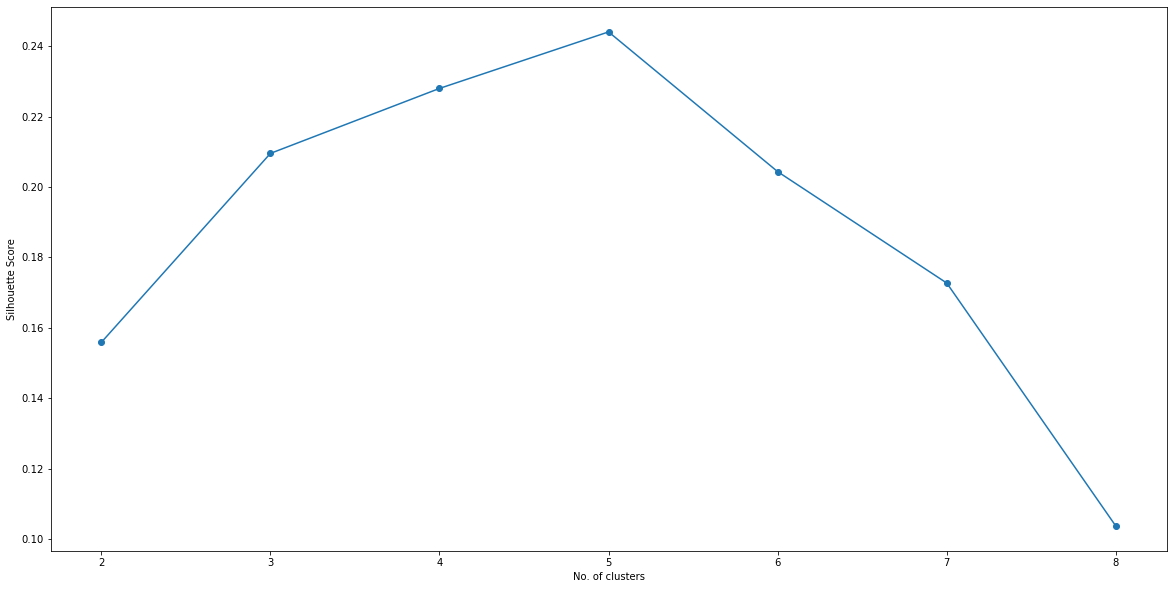

In [25]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

<h2>The optimum number for using in kMeans shall be k = 5 </h2>

In [26]:
kclusters = 5

# Run k-means clustering
sgc = Shatin_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(sgc)

In [27]:
# Add clustering labels
stationName_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [28]:
Shatin_merged = df_merged
Shatin_merged = Shatin_merged.join(stationName_venues_sorted.set_index('stationName'), on='stationName')
Shatin_merged.dropna(inplace = True)
Shatin_merged['Cluster Labels'] = Shatin_merged['Cluster Labels'].astype(int)
Shatin_merged

,stationName,code,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Tai Wai Station,TAW,22.373022,114.180118,2,Café,Chinese Restaurant,Fast Food Restaurant,Thai Restaurant,Ramen Restaurant
1,Che Kung Temple Station,CKT,22.374746,114.186186,1,Café,Cantonese Restaurant,Clothing Store,Vietnamese Restaurant,Park
2,Sha Tin Wai Station,STW,22.376982,114.195027,1,Café,Chinese Restaurant,Shopping Mall,Clothing Store,Dim Sum Restaurant
3,City One Station,CIO,22.382810,114.203746,4,Chinese Restaurant,Café,Train Station,Fast Food Restaurant,Coffee Shop
4,Shek Mun Station,SHM,22.387735,114.208445,4,Chinese Restaurant,Fast Food Restaurant,Shopping Mall,Train Station,Convenience Store
5,Tai Shui Hang Station,TSH,22.408496,114.222720,0,Café,Fast Food Restaurant,Shopping Mall,Bus Station,Convenience Store
6,Heng On Station,HEO,22.417615,114.225722,3,Chinese Restaurant,Bus Station,Bus Stop,Convenience Store,Market
7,Ma On Shan Station,MOS,22.422811,114.230191,3,Convenience Store,Shopping Mall,Asian Restaurant,Sushi Restaurant,Bus Stop
8,Wu Kai Sha Station,WKS,22.428360,114.243469,0,Shopping Mall,Café,Convenience Store,Fast Food Restaurant,Chinese Restaurant


In [29]:
# Create map
map_clusters = folium.Map(location=[shatin_lat, shatin_lng], zoom_start=14)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Shatin_merged['latitude'], Shatin_merged['longitude'], Shatin_merged['stationName'], Shatin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters


